In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**DataSet**

In [2]:
df=pd.read_csv("/content/master.csv")

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
df.drop("HDI for year",axis=1,inplace=True)
df.drop("country-year",axis=1,inplace=True)
df.drop("generation",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.9+ MB


In [6]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(int)

In [7]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.9+ MB


In [9]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [11]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
dtype: int64

In [12]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)'],
      dtype='object')

**Understanding Dataset**

In [13]:
continuous_columns = ["population", "suicides/100k pop",'suicides_no',' gdp_for_year ($) ', "gdp_per_capita ($)"]
category_columns = ["country",	"year",	"age", "sex"]

#Unsupervised

**Hypothesis testing / Statistical analysis**

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [15]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [16]:
res=[]
for i in continuous_columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)


,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,population,1.844794e+06,1.969090e+06,H0-There is no significant difference,1.684599,0.092347
1,suicides/100k pop,1.281610e+01,1.223622e+01,H0-There is no significant difference,0.687310,0.492031
2,suicides_no,2.425744e+02,2.290420e+02,H0-There is no significant difference,0.535303,0.592547
3,gdp_for_year ($),4.455810e+11,3.898639e+11,H0-There is no significant difference,0.671657,0.501941
4,gdp_per_capita ($),1.686646e+04,1.747219e+04,H0-There is no significant difference,-0.299598,0.764540


In [17]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [18]:
columns=continuous_columns
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)


,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,population&suicides/100k pop,Ha-There is significant difference,36.160100,8.285667e-271,Ha-There is significant difference,8.045971,2.258457e-07
1,population&suicides_no,Ha-There is significant difference,35.359785,1.187917e-259,Ha-There is significant difference,13.547397,6.995866e-11
2,population& gdp_for_year ($),Ha-There is significant difference,-22.544640,4.334962e-110,Ha-There is significant difference,-11.127745,1.683722e-09
3,population&gdp_per_capita ($),Ha-There is significant difference,34.877783,4.988402e-253,Ha-There is significant difference,7.083996,1.323440e-06
4,suicides/100k pop&suicides_no,Ha-There is significant difference,-20.175558,6.193172e-89,Ha-There is significant difference,-5.400756,3.932594e-05
5,suicides/100k pop& gdp_for_year ($),Ha-There is significant difference,-21.955835,1.245189e-104,Ha-There is significant difference,-6.329034,5.785461e-06
6,suicides/100k pop&gdp_per_capita ($),Ha-There is significant difference,-66.710156,0.000000e+00,Ha-There is significant difference,-17.572533,8.877827e-13
7,suicides_no& gdp_for_year ($),Ha-There is significant difference,-23.500042,3.175625e-119,Ha-There is significant difference,-8.397969,1.219168e-07
8,suicides_no&gdp_per_capita ($),Ha-There is significant difference,-66.632110,0.000000e+00,Ha-There is significant difference,-18.743623,2.943132e-13
9,gdp_for_year ($) &gdp_per_capita ($),Ha-There is significant difference,22.949148,6.473814e-114,Ha-There is significant difference,4.639834,2.036240e-04


In [19]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column" })

  return result

In [20]:
Category=category_columns
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)

,column,chi_square_test
0,country&year,There is relationship between two mentioned column
1,country&age,There is no relationship between two mentioned column
2,country&sex,There is no relationship between two mentioned column
3,year&age,There is no relationship between two mentioned column
4,year&sex,There is no relationship between two mentioned column
5,age&sex,There is no relationship between two mentioned column


In [21]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result


In [22]:
Category=category_columns
continous=continuous_columns
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)


,column,Annova_test
0,population&country,There is no relationship between mentioned column
1,population&year,There is relationship between mentioned column
2,population&age,There is no relationship between mentioned column
3,population&sex,There is relationship between mentioned column
4,suicides/100k pop&country,There is no relationship between mentioned column
5,suicides/100k pop&year,There is no relationship between mentioned column
6,suicides/100k pop&age,There is no relationship between mentioned column
7,suicides/100k pop&sex,There is no relationship between mentioned column
8,suicides_no&country,There is no relationship between mentioned column
9,suicides_no&year,There is relationship between mentioned column


**Preprocessing**

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
encode = OrdinalEncoder()
df['country'] = encode.fit_transform(df[['country']])
df['sex'] = encode.fit_transform(df[['sex']])
df['age'] = encode.fit_transform(df[['age']])


In [26]:
total_wcss=[]
for i in range(1,50):
  model=KMeans(i)
  model.fit(df)
  total_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
total_wcss


[5.878104601437387e+28,
 1.947759668357572e+28,
 7.301216961239783e+27,
 3.947856613822499e+27,
 2.613578301989964e+27,
 1.763133123464741e+27,
 1.3354296478619818e+27,
 1.0139866934079015e+27,
 8.089519717837855e+26,
 6.689365696359521e+26,
 5.3965378283558745e+26,
 4.336332339205134e+26,
 3.672674146338226e+26,
 3.1615912309370735e+26,
 2.679037345064626e+26,
 2.4564984776050905e+26,
 2.230351193401441e+26,
 2.0031975020219863e+26,
 1.804371604380312e+26,
 1.5317065998300235e+26,
 1.3585778630842673e+26,
 1.2933517681475964e+26,
 1.1683857274198427e+26,
 1.0599708163747893e+26,
 9.64694097146175e+25,
 8.829483829922648e+25,
 8.395737304625496e+25,
 7.713809375011361e+25,
 6.809413336988701e+25,
 6.6078524768532875e+25,
 6.026338918672503e+25,
 5.533142284962231e+25,
 5.3337456920920615e+25,
 4.967949259571209e+25,
 4.647421036245533e+25,
 4.220448433367876e+25,
 4.114439840810866e+25,
 3.633410222220166e+25,
 3.6070133447796308e+25,
 3.278762935753273e+25,
 2.9175296769035215e+25,
 2

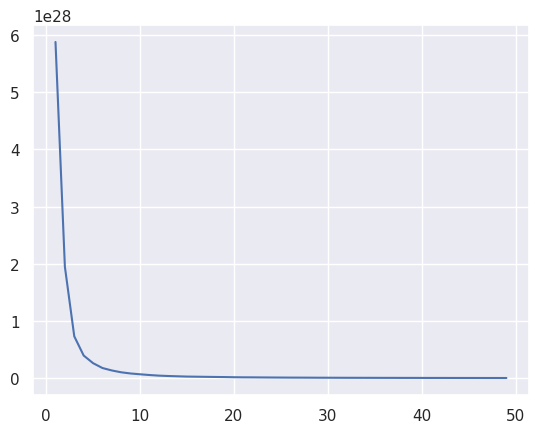

In [28]:
sns.set()
plt.plot(range(1,50),total_wcss)
plt.show()

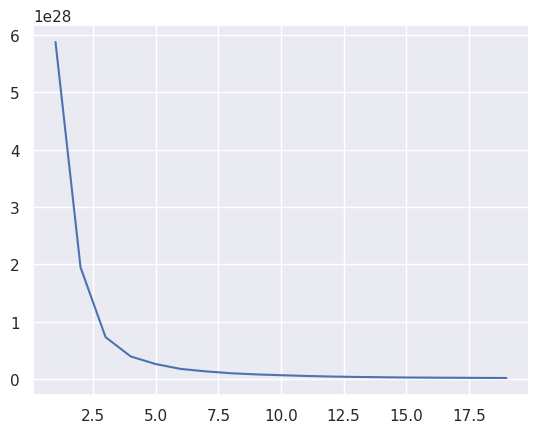

In [29]:
sns.set()
plt.plot(range(1,20),total_wcss[0:19])
plt.show()


In [30]:
result=KMeans(9).fit(df)
identify_cluster=result.fit_predict(df)
df["cluster"]=identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
df["cluster"].value_counts()

cluster
0    20136
8     4516
4     1572
3      816
5      408
1      144
7       84
2       84
6       60
Name: count, dtype: int64

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  float64
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  float64
 3   age                 27820 non-null  float64
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   cluster             27820 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 2.0 MB


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


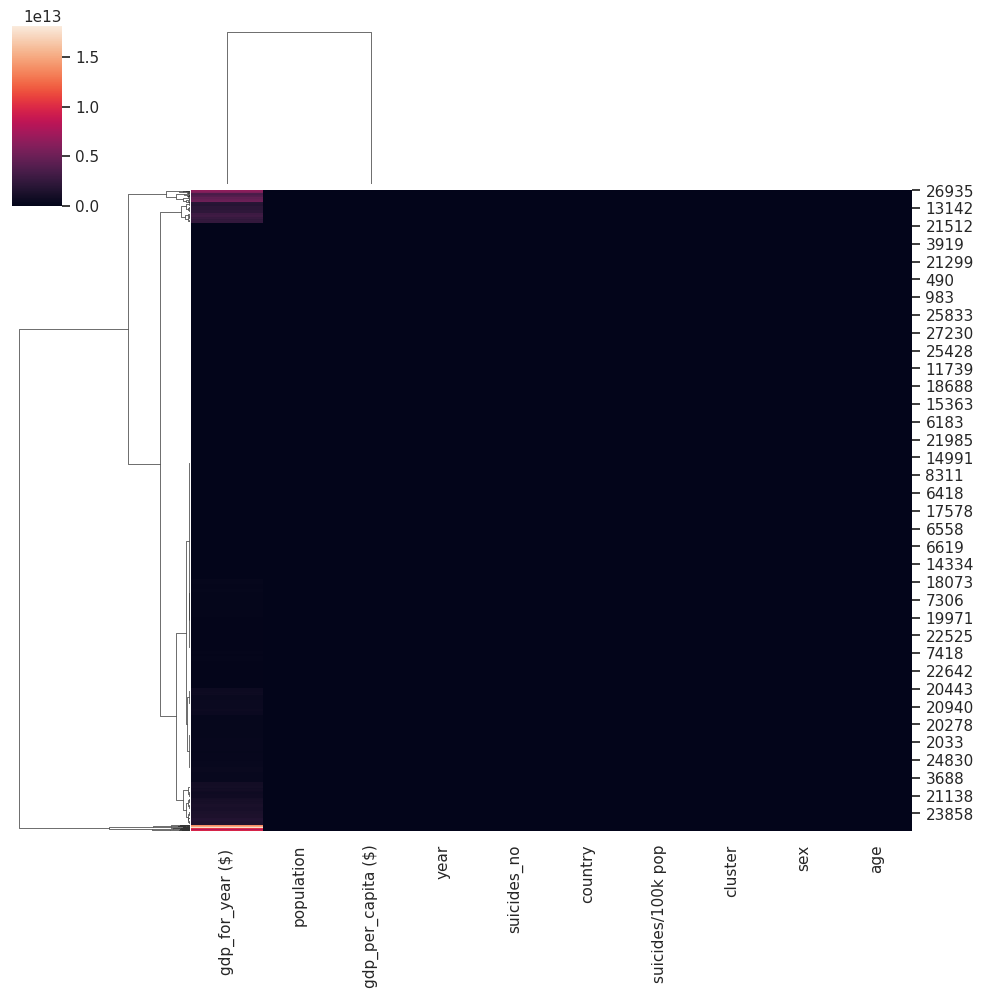

In [33]:
sns.clustermap(df)

In [35]:
df[df['cluster'] ==6]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),cluster
27160,98.0,2011,1.0,5.0,2721,7448796,36.53,15517926000000,53452,6
27161,98.0,2011,1.0,2.0,11681,42566273,27.44,15517926000000,53452,6
27162,98.0,2011,1.0,4.0,7572,28556351,26.52,15517926000000,53452,6
27163,98.0,2011,1.0,1.0,4862,20698307,23.49,15517926000000,53452,6
27164,98.0,2011,1.0,0.0,3959,22622559,17.50,15517926000000,53452,6
27165,98.0,2011,0.0,2.0,3776,42485156,8.89,15517926000000,53452,6
27166,98.0,2011,0.0,4.0,2128,31268702,6.81,15517926000000,53452,6
27167,98.0,2011,0.0,1.0,1238,20408037,6.07,15517926000000,53452,6
27168,98.0,2011,0.0,0.0,863,21552069,4.00,15517926000000,53452,6
27169,98.0,2011,0.0,5.0,421,11270969,3.74,15517926000000,53452,6
